----

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

visits=pd.read_csv("/datasets/visits_log_us.csv")
costs = pd.read_csv("/datasets/costs_us.csv")
orders = pd.read_csv("/datasets/orders_log_us.csv")

1- Visitas:

¿Cuántas personas lo usan cada día, semana y mes?

¿Cuántas sesiones hay por día? (Un usuario puede tener más de una sesión).

¿Cuál es la duración de cada sesión?

¿Con qué frecuencia los usuarios regresan?

In [2]:
print(visits.head())

    Device               End Ts  Source Id             Start Ts  \
0    touch  2017-12-20 17:38:00          4  2017-12-20 17:20:00   
1  desktop  2018-02-19 17:21:00          2  2018-02-19 16:53:00   
2    touch  2017-07-01 01:54:00          5  2017-07-01 01:54:00   
3  desktop  2018-05-20 11:23:00          9  2018-05-20 10:59:00   
4  desktop  2017-12-27 14:06:00          3  2017-12-27 14:06:00   

                    Uid  
0  16879256277535980062  
1    104060357244891740  
2   7459035603376831527  
3  16174680259334210214  
4   9969694820036681168  


In [3]:
#en primer lugar,se deben cambiar todas las mayusculas a minusculas y los espacios por guiones bajos  en los enunciados para mayor claridad al trabajar con los datos

visits.columns = visits.columns.str.lower().str.replace(' ', '_')

display(visits.head())

,device,end_ts,source_id,start_ts,uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [4]:
#se corrobora que no hay datos no existentes en la tabla visits 
print(visits.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   device     359400 non-null  object
 1   end_ts     359400 non-null  object
 2   source_id  359400 non-null  int64 
 3   start_ts   359400 non-null  object
 4   uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB
None


In [5]:
#conocemos la cantidad de distintos usuarios que visitaron el sitio

distinct_users_count = visits['uid'].nunique()

print(distinct_users_count)

228169


In [6]:

#primero se deben convertir las fechas del dataframe visits al formato datetime

visits['start_ts'] = pd.to_datetime(visits['start_ts'])

#se extraen los días, semanas y meses
visits['Dia'] = visits['start_ts'].dt.date  # Fecha sin hora
visits['Semana'] = visits['start_ts'].dt.to_period('W').dt.start_time  # Inicio de la semana
visits['Mes'] = visits['start_ts'].dt.to_period('M').dt.start_time  # Inicio del mes


#se calcula la cantidad de usuarios  por día
users_per_day =  visits.groupby(visits['start_ts'].dt.date)['uid'].nunique().reset_index(name='day_count')
users_per_day.columns = ['start_ts', 'daily_users_count']

#se calcula la cantidad de usuarios por semana
users_per_week = visits.groupby(visits['Semana'])['uid'].nunique().reset_index(name='week_count')
users_per_week.columns = ['start_ts', 'weekly_users_count']

#se calcula la cantidad de usuarios por mes
users_per_month = visits.groupby(visits['Mes'])['uid'].nunique().reset_index(name='month_count')
users_per_month.columns = ['start_ts', 'monthly_users_count']

print(users_per_day.head(10))
print(users_per_week.head(5))
print(users_per_month.head(12))



     start_ts  daily_users_count
0  2017-06-01                605
1  2017-06-02                608
2  2017-06-03                445
3  2017-06-04                476
4  2017-06-05                820
5  2017-06-06                797
6  2017-06-07                699
7  2017-06-08                868
8  2017-06-09                695
9  2017-06-10                350
    start_ts  weekly_users_count
0 2017-05-29                2021
1 2017-06-05                4129
2 2017-06-12                2812
3 2017-06-19                2878
4 2017-06-26                3064
     start_ts  monthly_users_count
0  2017-06-01                13259
1  2017-07-01                14183
2  2017-08-01                11631
3  2017-09-01                18975
4  2017-10-01                29692
5  2017-11-01                32797
6  2017-12-01                31557
7  2018-01-01                28716
8  2018-02-01                28749
9  2018-03-01                27473
10 2018-04-01                21008
11 2018-05-01      

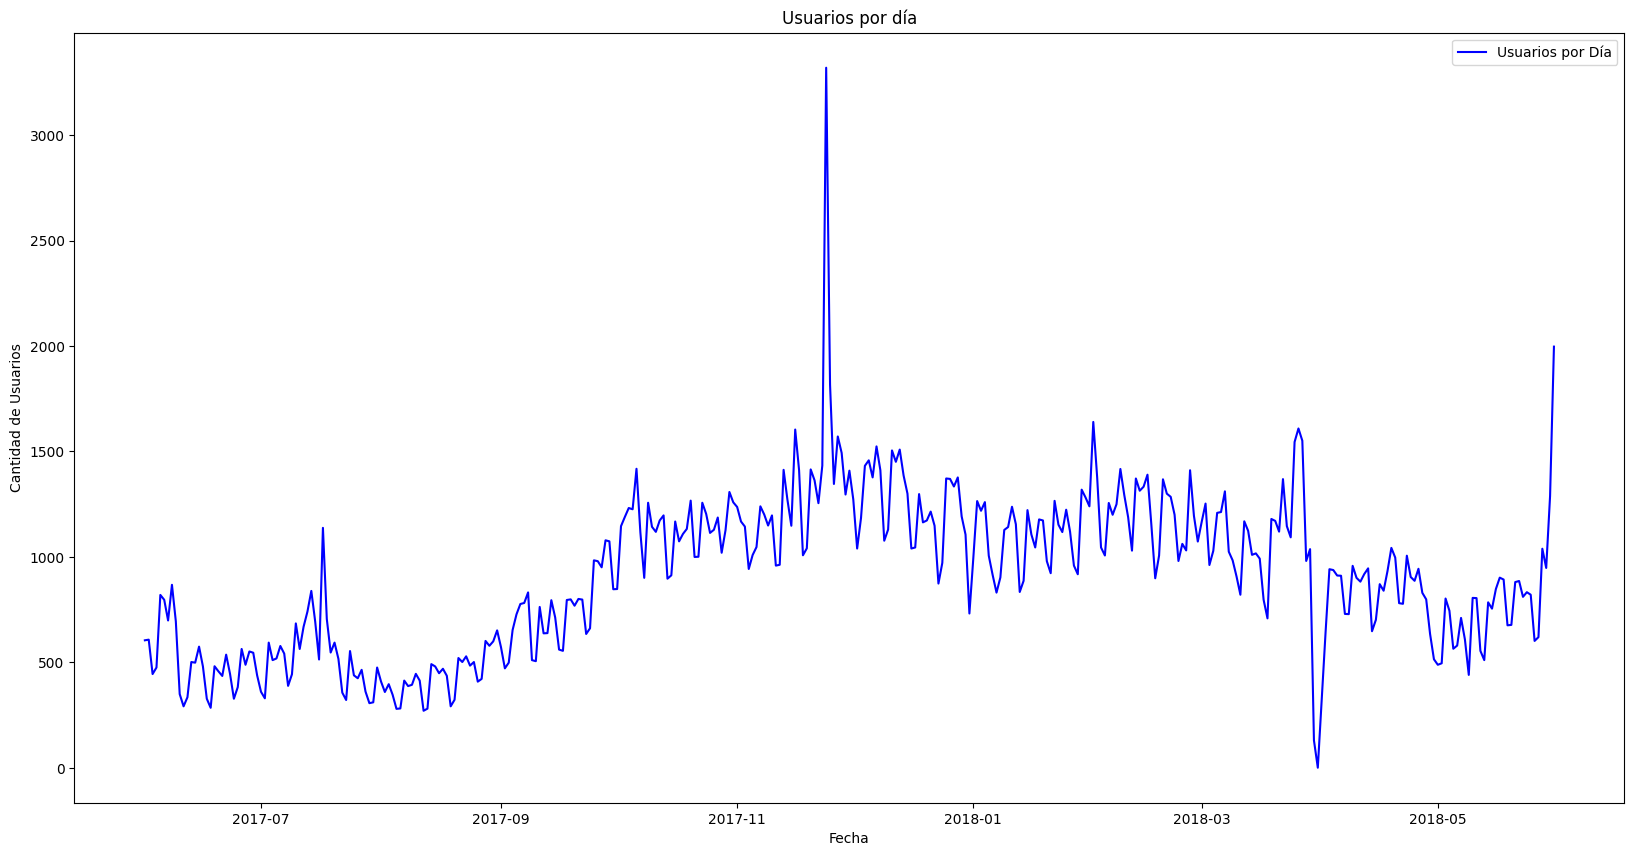

In [7]:
#se realiza gráfico que muestra la cantidad de usuarios que visitaron el sitio por día
plt.figure(figsize=(20, 10))
plt.plot(users_per_day['start_ts'], users_per_day['daily_users_count'], label='Usuarios por Día', color='blue')
plt.title('Usuarios por día')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de Usuarios')
plt.legend()
plt.show()

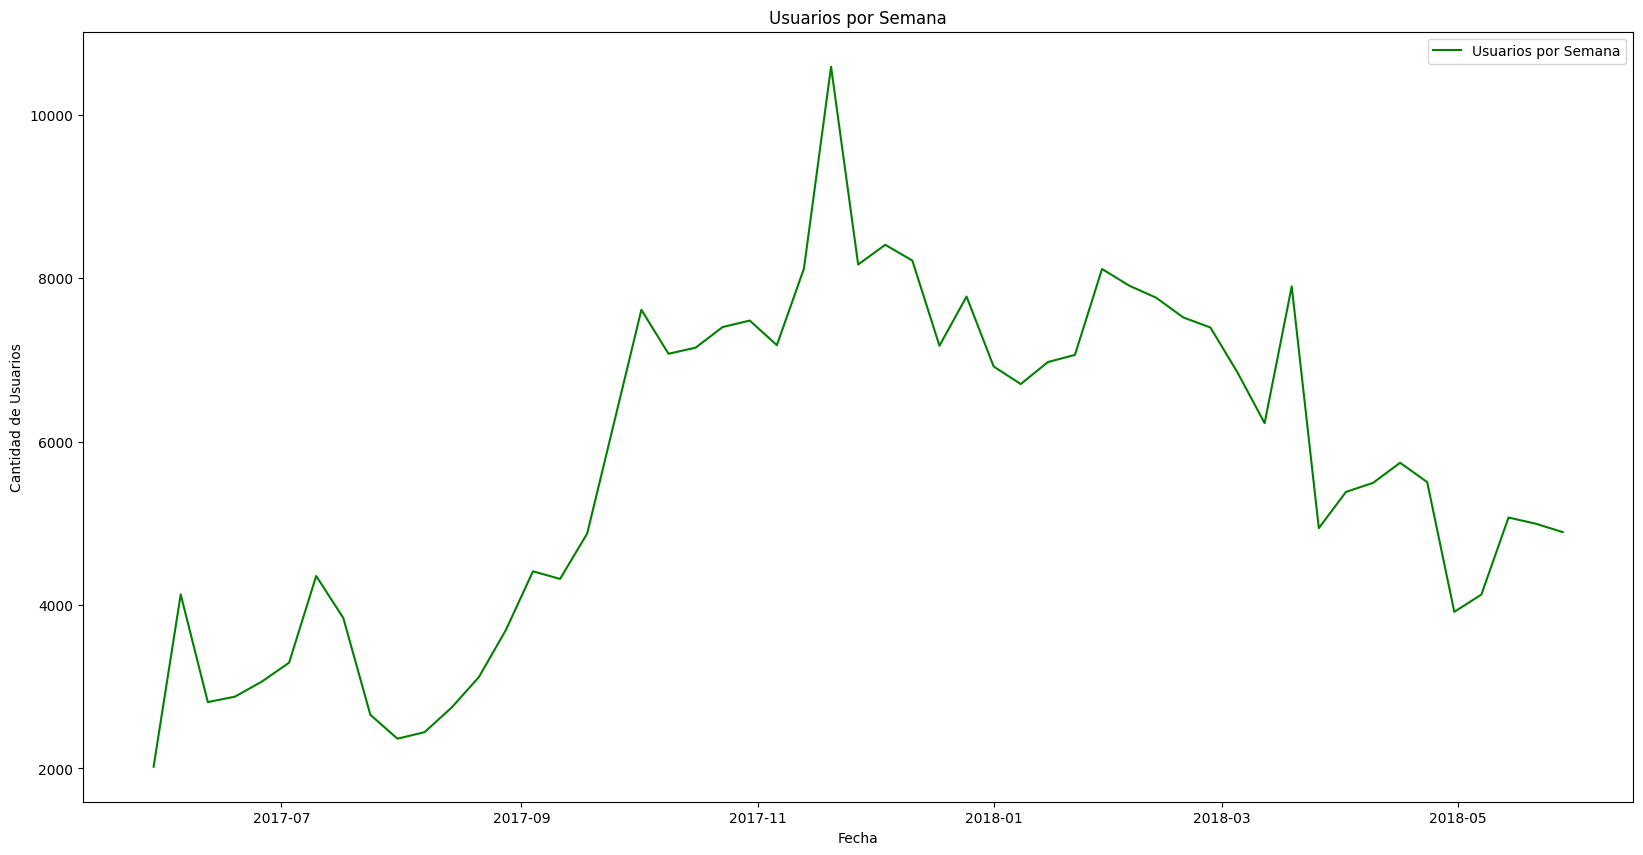

In [8]:
#se realiza gráfico que muestra la cantidad de usuarios que visitaron el sitio por semana
plt.figure(figsize=(20, 10))
plt.plot(users_per_week['start_ts'], users_per_week['weekly_users_count'], label='Usuarios por Semana', color='green')
plt.title('Usuarios por Semana')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de Usuarios')
plt.legend()
plt.show()


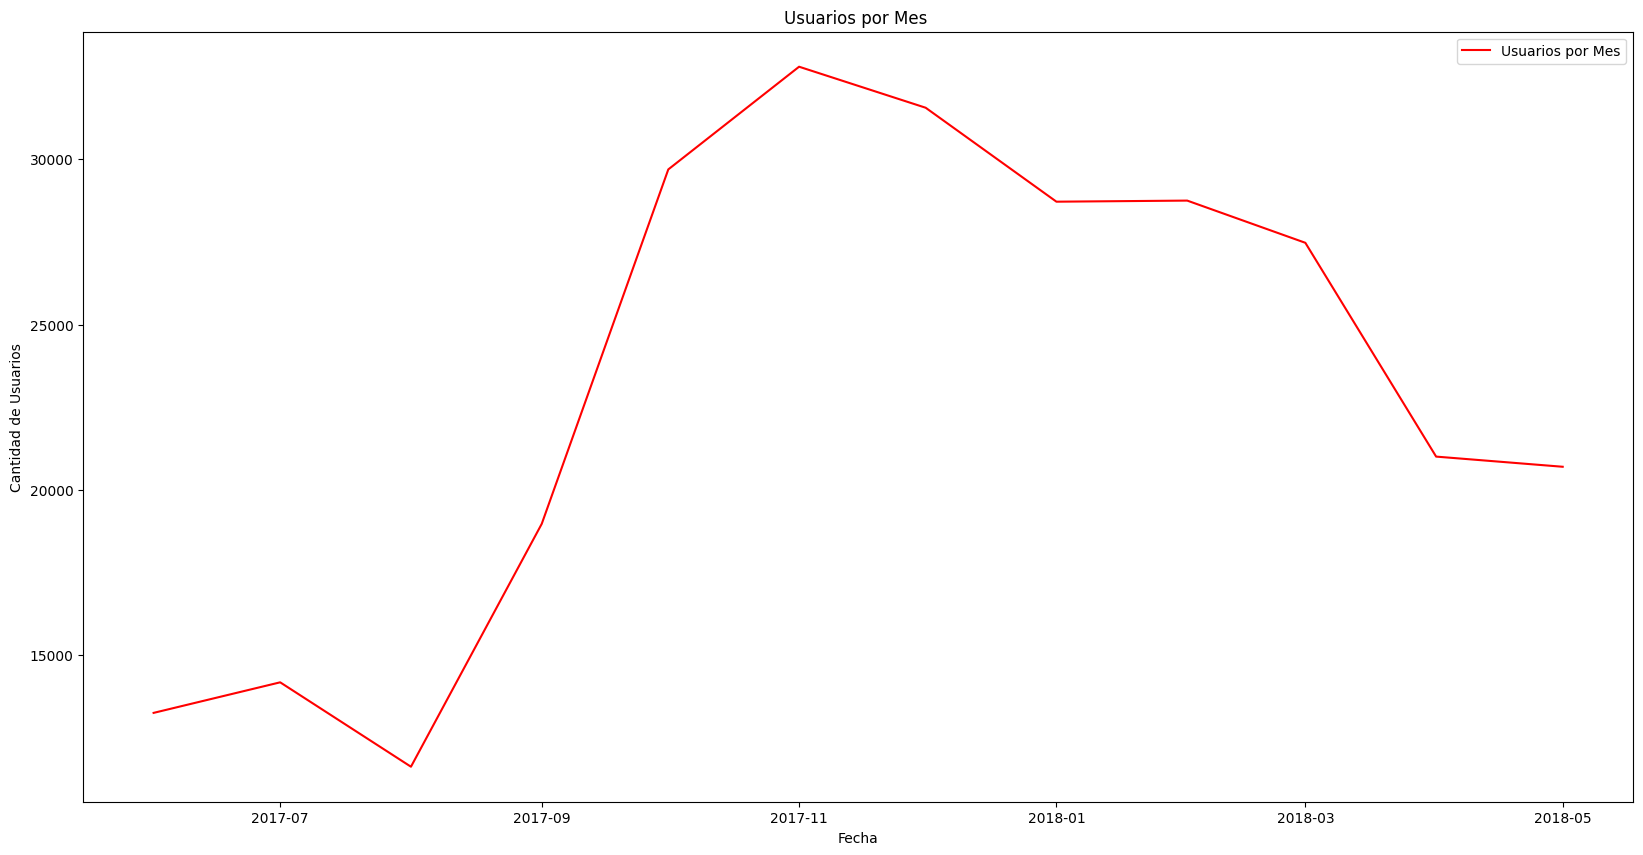

In [9]:
#se realiza gráfico que muestra la cantidad de usuarios que visitaron el sitio por mes
plt.figure(figsize=(20, 10))
plt.plot(users_per_month['start_ts'], users_per_month['monthly_users_count'], label='Usuarios por Mes', color='red')
plt.title('Usuarios por Mes ')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de Usuarios')
plt.legend()
plt.show()

In [10]:
#se cuentan las sesiones por día

sessions_per_day = visits.resample('D', on='start_ts').size().reset_index(name='daily_sessions_count')
sessions_per_day.columns = ['start_ts', 'daily_visit_count']

print(sessions_per_day.head(10))

    start_ts  daily_visit_count
0 2017-06-01                664
1 2017-06-02                658
2 2017-06-03                477
3 2017-06-04                510
4 2017-06-05                893
5 2017-06-06                875
6 2017-06-07                788
7 2017-06-08                939
8 2017-06-09                755
9 2017-06-10                375


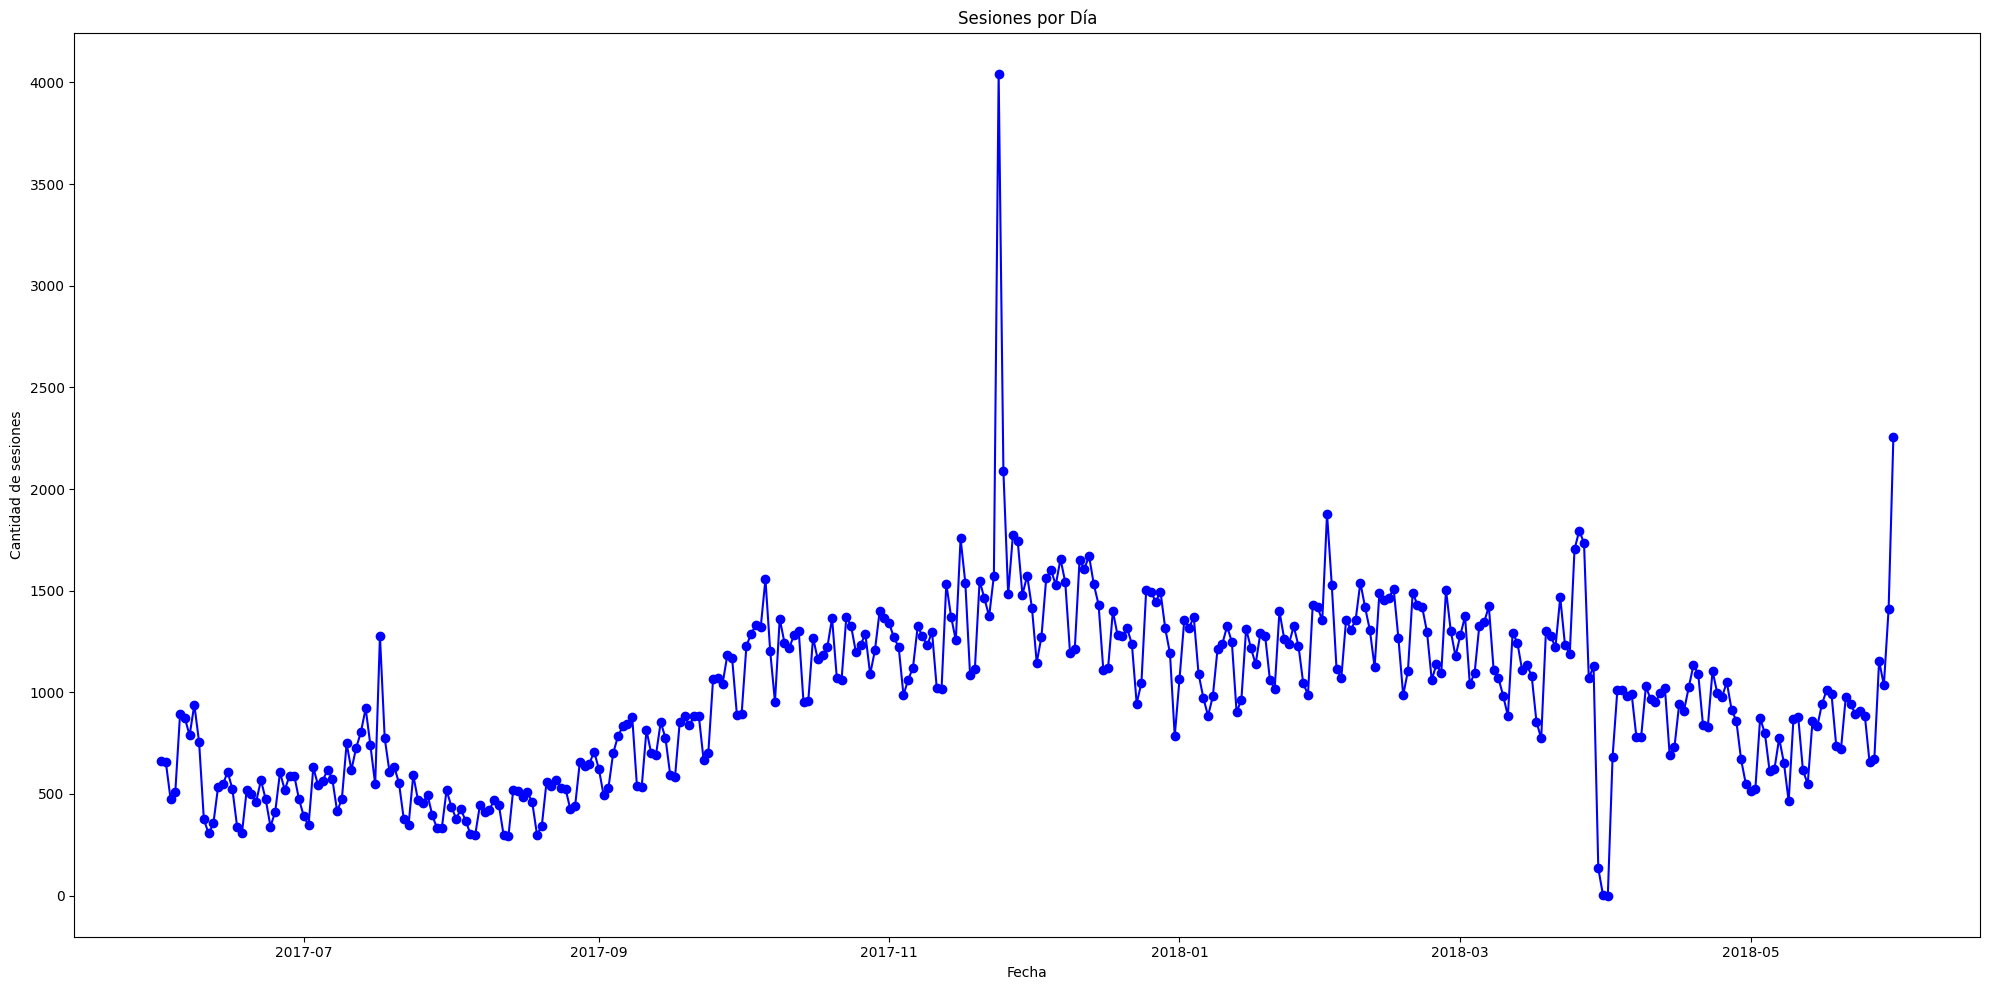

In [11]:
#se realiza gráfico que muestra las sesiones por día 
plt.figure(figsize=(20, 10))

plt.plot(sessions_per_day['start_ts'], sessions_per_day['daily_visit_count'], label='Sesiones por Día', color='blue', marker='o', linestyle='-')
plt.title('Sesiones por Día')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de sesiones')
plt.tight_layout()  
plt.show()

In [12]:

visits['start_ts'] = pd.to_datetime(visits['start_ts'])

# Se calcula el número de usuarios únicos por día (DAU)
dau = visits.groupby(visits['start_ts'].dt.date)['uid'].nunique().reset_index()
dau.columns = ['date', 'dau']

# Se calcula el núemro de usuarios únicos por semana (WAU)
visits['week'] = visits['start_ts'].dt.to_period('W').dt.start_time
wau = visits.groupby('week')['uid'].nunique().reset_index()
wau.columns = ['week', 'wau']

# Se calcula el número de usuarios únicos por mes(MAU)
visits['month'] = visits['start_ts'].dt.to_period('M').dt.start_time
mau = visits.groupby('month')['uid'].nunique().reset_index()
mau.columns = ['month', 'mau']

# Se combinan los valores de  DAU con WAU y MAU
dau['week'] = pd.to_datetime(dau['date']).dt.to_period('W').dt.start_time
dau['month'] = pd.to_datetime(dau['date']).dt.to_period('M').dt.start_time

# Unir DAU con WAU
sticky_weekly = dau.merge(wau, on='week', how='left')
sticky_weekly['sticky_factor_weekly'] = sticky_weekly['dau'] / sticky_weekly['wau']

# Unir DAU con MAU
sticky_monthly = dau.merge(mau, on='month', how='left')
sticky_monthly['sticky_factor_monthly'] = sticky_monthly['dau'] / sticky_monthly['mau']

# Mostrar resultados
print("Sticky Factor Semanal (DAU/WAU):")
print(sticky_weekly[['date', 'sticky_factor_weekly']])

print("\nSticky Factor Mensual (DAU/MAU):")
print(sticky_monthly[['date', 'sticky_factor_monthly']])

Sticky Factor Semanal (DAU/WAU):
           date  sticky_factor_weekly
0    2017-06-01              0.299357
1    2017-06-02              0.300841
2    2017-06-03              0.220188
3    2017-06-04              0.235527
4    2017-06-05              0.198595
..          ...                   ...
359  2018-05-27              0.124124
360  2018-05-28              0.212388
361  2018-05-29              0.193786
362  2018-05-30              0.263491
363  2018-05-31              0.408217

[364 rows x 2 columns]

Sticky Factor Mensual (DAU/MAU):
           date  sticky_factor_monthly
0    2017-06-01               0.045629
1    2017-06-02               0.045856
2    2017-06-03               0.033562
3    2017-06-04               0.035900
4    2017-06-05               0.061845
..          ...                    ...
359  2018-05-27               0.029950
360  2018-05-28               0.050191
361  2018-05-29               0.045795
362  2018-05-30               0.062268
363  2018-05-31         

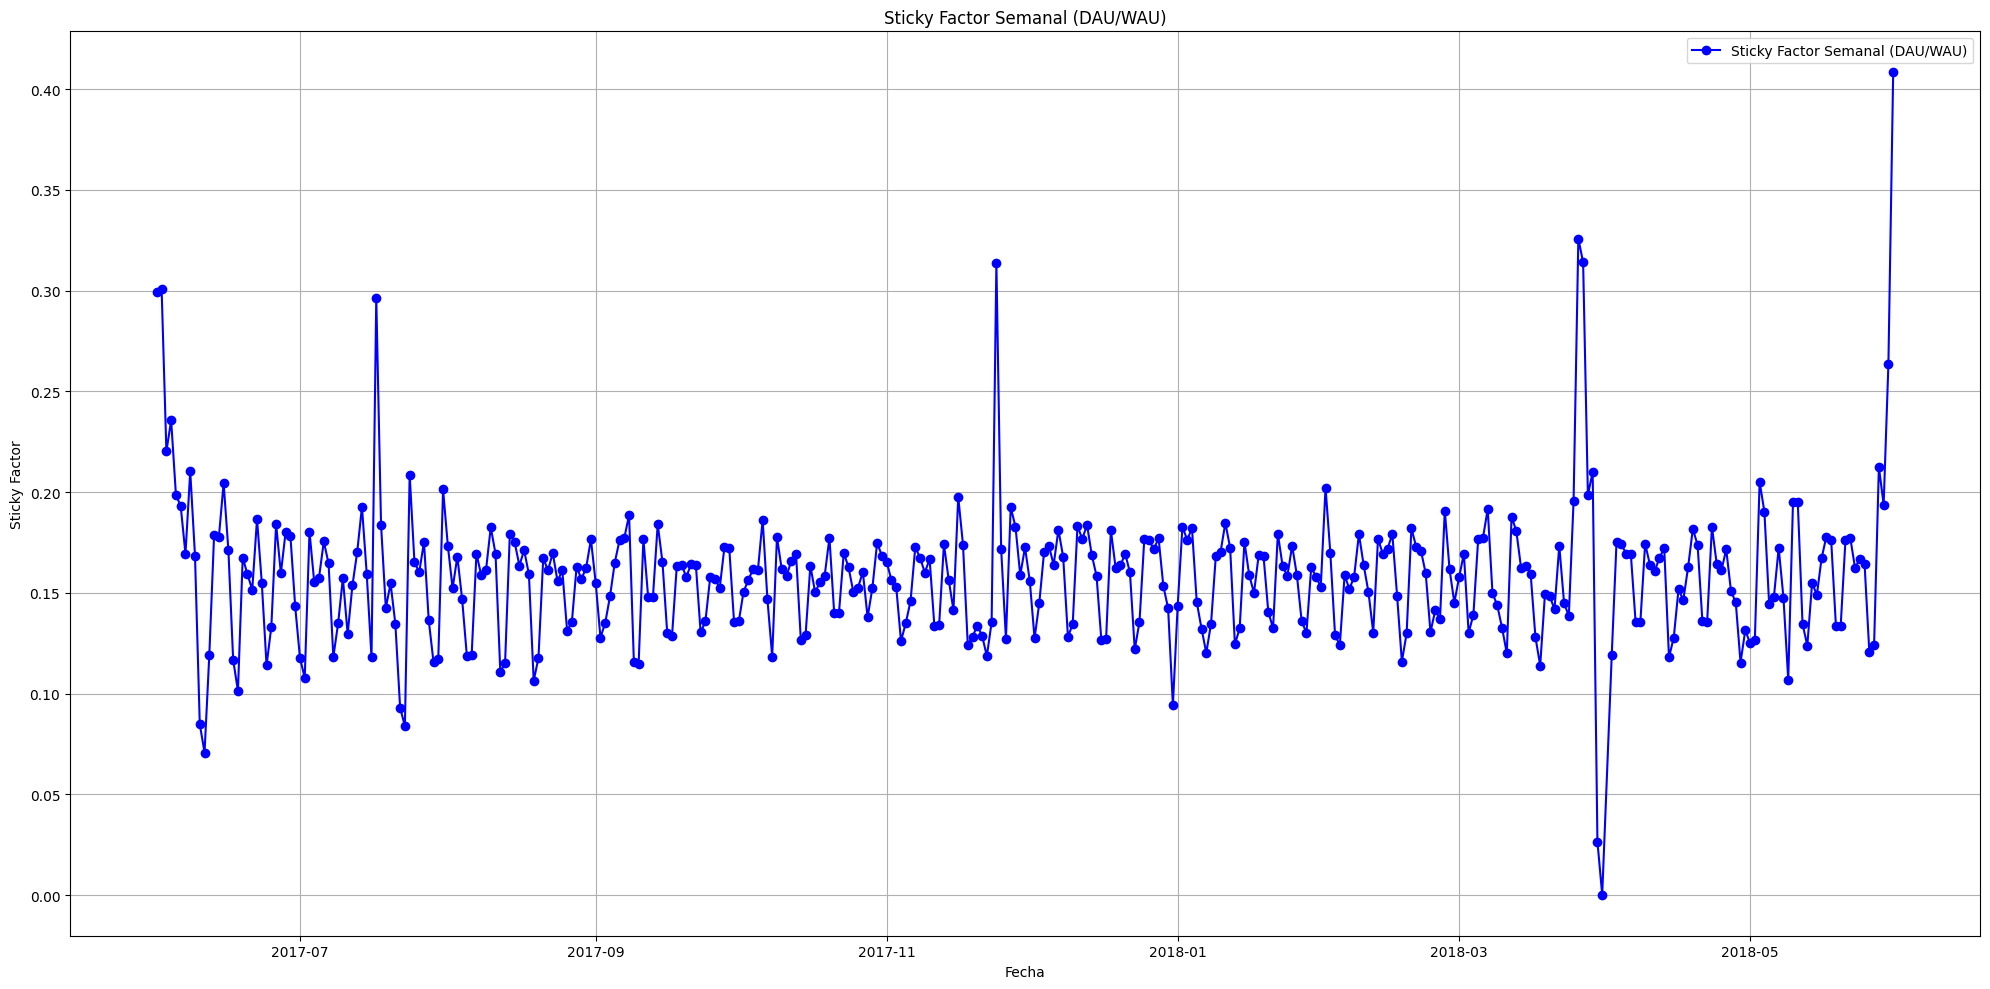

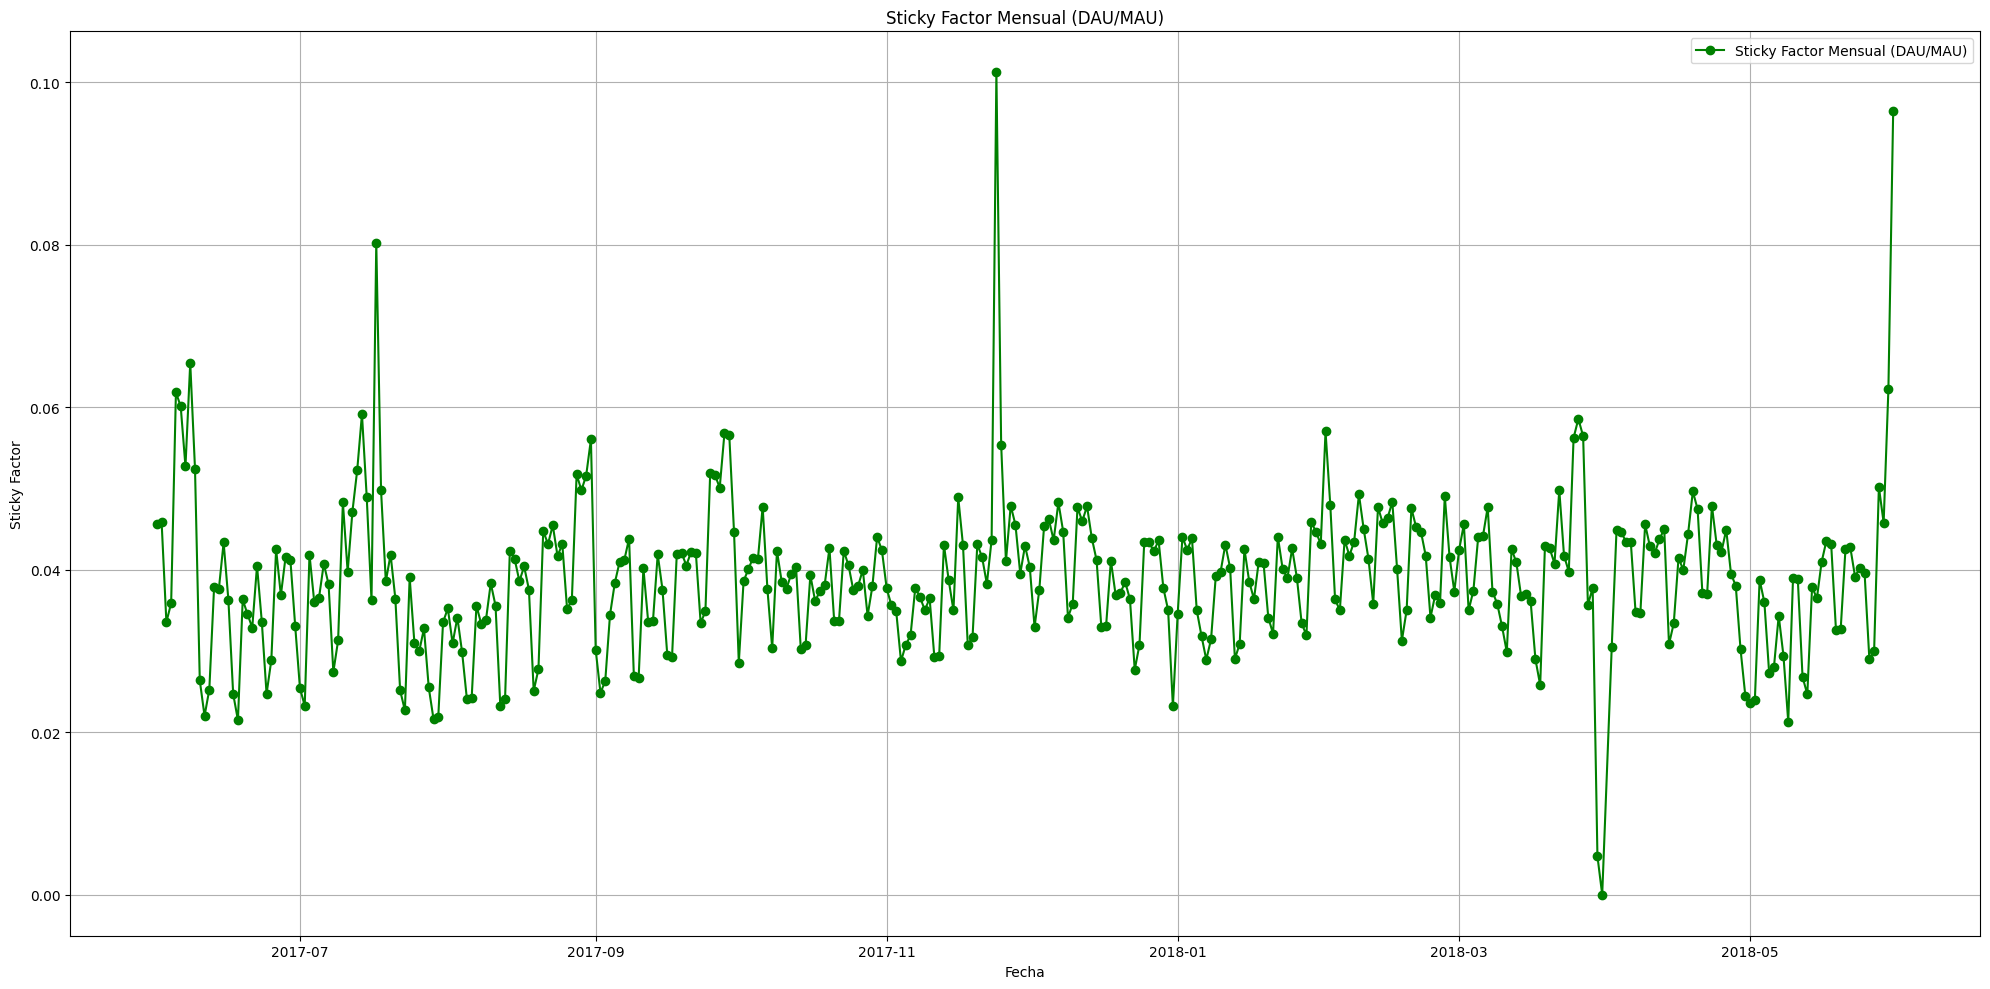

In [13]:
#Se grafican ambos sticky factor para observarlos más claramente

plt.figure(figsize=(20, 10))
plt.plot(sticky_weekly['date'], sticky_weekly['sticky_factor_weekly'], label='Sticky Factor Semanal (DAU/WAU)', color='blue', marker='o')
plt.title('Sticky Factor Semanal (DAU/WAU)')
plt.xlabel('Fecha')
plt.ylabel('Sticky Factor')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(20, 10))
plt.plot(sticky_monthly['date'], sticky_monthly['sticky_factor_monthly'], label='Sticky Factor Mensual (DAU/MAU)', color='green', marker='o')
plt.title('Sticky Factor Mensual (DAU/MAU)')
plt.xlabel('Fecha')
plt.ylabel('Sticky Factor')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


2- ¿Cuándo empieza la gente a comprar? (En el análisis de KPI, generalmente nos interesa saber el tiempo que transcurre entre el registro y la conversión, es decir, cuando el usuario se convierte en cliente. Por ejemplo, si el registro y la primera compra ocurren el mismo día, el usuario podría caer en la categoría Conversion 0d. Si la primera compra ocurre al día siguiente, será Conversion 1d. Puedes usar cualquier enfoque que te permita comparar las conversiones de diferentes cohortes para que puedas determinar qué cohorte o canal de marketing es más efectivo.)

¿Cuántos pedidos hacen durante un período de tiempo dado?

¿Cuál es el tamaño promedio de compra?

¿Cuánto dinero traen? (LTV)

In [14]:
#en primer lugar,se deben cambiar todas las mayusculas a minusculas y los espacios por guiones bajos  en los enunciados para mayor claridad al trabajar con los datos

orders.columns = orders.columns.str.lower().str.replace(' ', '_')

print(orders.head())

                buy_ts  revenue                   uid
0  2017-06-01 00:10:00    17.00  10329302124590727494
1  2017-06-01 00:25:00     0.55  11627257723692907447
2  2017-06-01 00:27:00     0.37  17903680561304213844
3  2017-06-01 00:29:00     0.55  16109239769442553005
4  2017-06-01 07:58:00     0.37  14200605875248379450


In [15]:
#se corrobora que no hay datos no existentes en la tabla orders

print(orders.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   buy_ts   50415 non-null  object 
 1   revenue  50415 non-null  float64
 2   uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB
None


In [16]:
#conocemos la cantidad de distintos usuarios que hicieron ordenes en el sitio

distinct_users_count = orders['uid'].nunique()

print(distinct_users_count)

36523


In [17]:
#convierto los datos de las fechas de inicio de la visita y compra a tipo datetime
visits['start_ts'] = pd.to_datetime(visits['start_ts'])
orders['buy_ts'] = pd.to_datetime(orders['buy_ts'])  

#primero se encuentra la primera visita de cada usuario
first_visit = visits.groupby('uid')['start_ts'].min().reset_index()
first_visit.rename(columns={'start_ts': 'first_visit_ts'}, inplace=True)

#ahora, se encuentra la primera compra de cada usuario
first_purchase = orders.groupby('uid')['buy_ts'].min().reset_index()
first_purchase.rename(columns={'buy_ts': 'first_purchase_ts'}, inplace=True)

#se combinan las tablas first_visit con first_purchase, pues se debe relacionar la fecha de la primera visita con la fecha de la compra
combined_data = pd.merge(first_visit, first_purchase, on='uid', how='inner')

# se calcula el tiempo transcurrido entre la primera visita y la primera compra
combined_data['time_to_purchase'] = (combined_data['first_purchase_ts'] - combined_data['first_visit_ts']).dt.days

display(combined_data[['uid', 'first_visit_ts', 'first_purchase_ts', 'time_to_purchase']])

,uid,first_visit_ts,first_purchase_ts,time_to_purchase
0,313578113262317,2017-09-18 22:49:00,2018-01-03 21:51:00,106
1,1575281904278712,2017-06-03 10:13:00,2017-06-03 10:13:00,0
2,2429014661409475,2017-10-11 17:14:00,2017-10-11 18:33:00,0
3,2464366381792757,2018-01-27 20:10:00,2018-01-28 15:54:00,0
4,2551852515556206,2017-11-24 10:14:00,2017-11-24 10:14:00,0
...,...,...,...,...
36518,18445147675727495770,2017-08-20 13:30:00,2017-11-24 09:03:00,95
36519,18445407535914413204,2017-09-22 23:48:00,2017-09-22 23:55:00,0
36520,18445601152732270159,2017-08-07 11:51:00,2018-03-26 22:54:00,231
36521,18446156210226471712,2017-11-07 10:01:00,2018-02-18 19:34:00,103


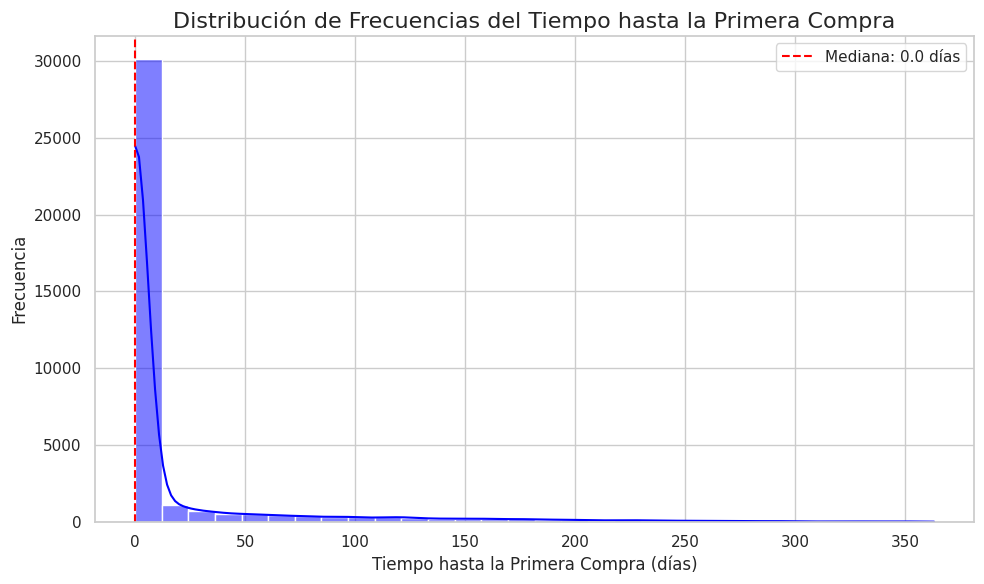

In [18]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))  # Tamaño del gráfico
sns.histplot(combined_data['time_to_purchase'], bins=30, kde=True, color='blue')

# Personalizar el gráfico
plt.title('Distribución de Frecuencias del Tiempo hasta la Primera Compra', fontsize=16)
plt.xlabel('Tiempo hasta la Primera Compra (días)', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.axvline(combined_data['time_to_purchase'].median(), color='red', linestyle='--', label=f'Mediana: {combined_data["time_to_purchase"].median():.1f} días')
plt.legend()  
plt.tight_layout() 
plt.show()



### 

Se calculará la cantidad de pedidos realizados en cada mes del período que se está estudiando

In [19]:
#se observará ahora cuántos pedidos se hacen en cada mes de ambos años 
orders['buy_ts'] = pd.to_datetime(orders['buy_ts'])

# Extraer el año y el mes de la fecha de compra
orders['year_month'] = orders['buy_ts'].dt.to_period('M')

# se cuenta el número de pedidos por mes
monthly_orders = orders.groupby('year_month').size().reset_index(name='order_count')

display(monthly_orders)


,year_month,order_count
0,2017-06,2354
1,2017-07,2363
2,2017-08,1807
3,2017-09,3387
4,2017-10,5679
5,2017-11,5659
6,2017-12,6218
7,2018-01,4721
8,2018-02,5281
9,2018-03,5326


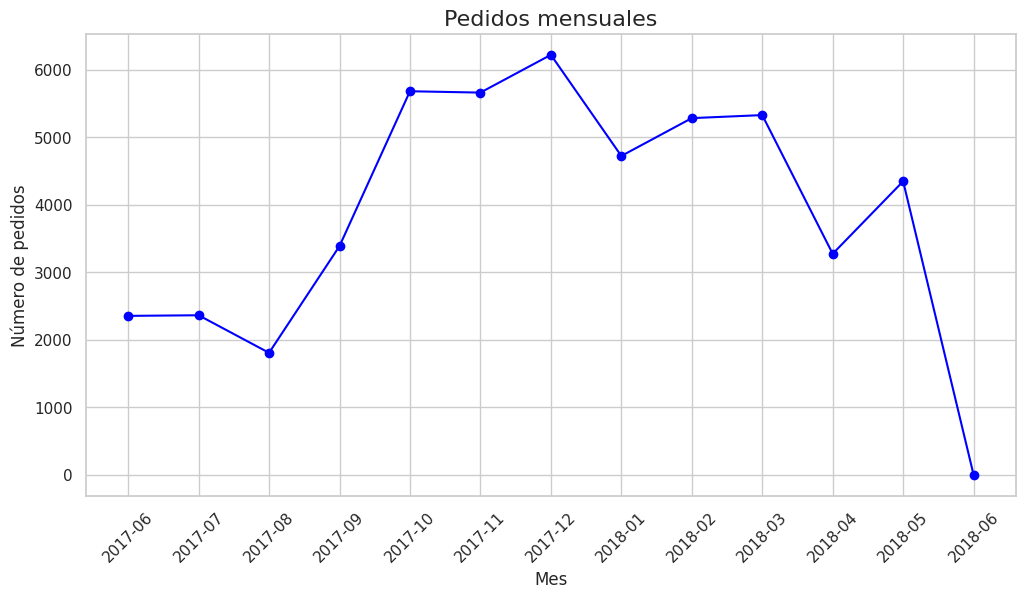

In [20]:
#se grafican los valores para observar más claramente los resultados
monthly_orders['year_month'] = monthly_orders['year_month'].astype(str)

# Crear el gráfico de línea
plt.figure(figsize=(12, 6))
plt.plot(monthly_orders['year_month'], monthly_orders['order_count'], marker='o', color='blue', linestyle='-')

# Personalizar el gráfico
plt.title('Pedidos mensuales', fontsize=16)
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Número de pedidos', fontsize=12)
plt.xticks(rotation=45)  # Rotar las etiquetas del eje X para mejor legibilidad
plt.show()

In [21]:
#se calcula el tamaño promedio de compra (monto) en el mismo período
avg_purchase_size = orders.groupby('year_month')['revenue'].mean().reset_index(name='avg_purchase_size')

# Mostrar el resultado
display(avg_purchase_size)


,year_month,avg_purchase_size
0,2017-06,4.060106
1,2017-07,5.306589
2,2017-08,4.847139
3,2017-09,5.416448
4,2017-10,4.928280
5,2017-11,4.783518
6,2017-12,5.852139
7,2018-01,4.112927
8,2018-02,4.840095
9,2018-03,5.413930


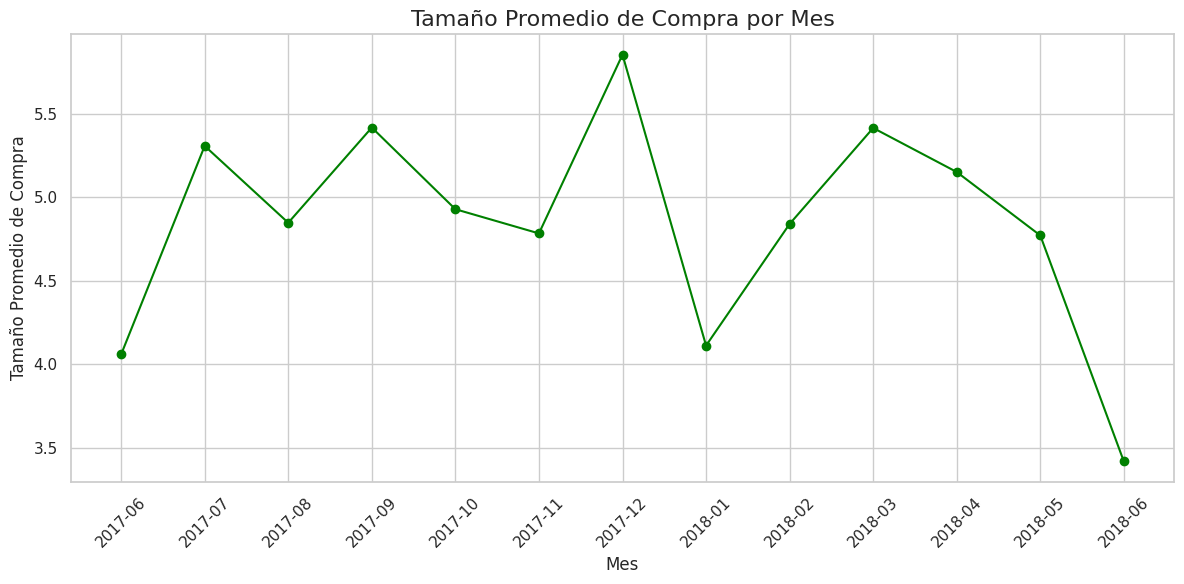

In [22]:
#se grafican los valores para observar más claramente los resultados
avg_purchase_size['year_month'] = avg_purchase_size['year_month'].astype(str)

# Crear el gráfico de línea
plt.figure(figsize=(12, 6))
plt.plot(avg_purchase_size['year_month'], avg_purchase_size['avg_purchase_size'], marker='o', color='green', linestyle='-')

# Personalizar el gráfico
plt.title('Tamaño Promedio de Compra por Mes', fontsize=16)
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Tamaño Promedio de Compra', fontsize=12)
plt.xticks(rotation=45)  # Rotar las etiquetas del eje X para mejor legibilidad
plt.grid(True)  # Habilitar la cuadrícula
plt.tight_layout()  # Ajustar el layout
plt.show()

Para calcular el LTV, se debe conocer ingresos promedio por compra, la frecuencia de compra y vida útil del cliente

In [23]:
#primero, se obtiene la primera compra de cada usuario y se crea la columna de mes de su primera compra
first_purchase = orders.groupby('uid')['buy_ts'].min().reset_index()
first_purchase.rename(columns={'buy_ts': 'first_purchase_ts'}, inplace=True)
first_purchase['first_purchase_month'] = first_purchase['first_purchase_ts'].dt.to_period('M')

#se une a la tabla de orders y se crea la columna que contiene el mes de la orden
orders_with_cohort = pd.merge(orders, first_purchase[['uid', 'first_purchase_month']], on='uid', how='left')
orders_with_cohort['order_month'] = orders_with_cohort['buy_ts'].dt.to_period('M')

#se crea la columna cohort_age
orders_with_cohort['cohort_age'] = (orders_with_cohort['order_month'] - orders_with_cohort['first_purchase_month']).apply(lambda x: x.n)

#se agrupa por first_purchase_month y se cuentan los usuarios distintos
cohort_size = first_purchase.groupby('first_purchase_month')['uid'].nunique().reset_index()
cohort_size.rename(columns={'uid': 'cohort_size'}, inplace=True)

## Crear tabla ltv
## se agrupa por first_purchase_month y cohort_age,se suma revenue
ltv_table = orders_with_cohort.groupby(['first_purchase_month', 'cohort_age'])['revenue'].sum().reset_index()

## Hacer left join con la tabla anterior que cuenta cuántos usuarios hay por cohorte
ltv_table = pd.merge(ltv_table, cohort_size, on='first_purchase_month', how='left')

## Calcular ltv
## En la tabla ltv anterior crear columna ltv=revenue/usuarios_cohorte
ltv_table['ltv'] = ltv_table['revenue'] / ltv_table['cohort_size']

## Transformar a tabla pivote y acumular en axis=1 el revenue
ltv_table_pivot = ltv_table.pivot_table(
    index='first_purchase_month', columns='cohort_age',
    values='ltv', aggfunc='sum'
).cumsum(axis=1)  # Se acumula el revenue de forma horizontal

## Mostrar la tabla pivote
display(ltv_table_pivot)

cohort_age,0,1,2,3,4,5,6,7,8,9,10,11
first_purchase_month,,,,,,,,,,,,
2017-06,4.724414,5.209743,5.647380,6.602051,7.624582,8.360084,9.310524,9.892116,10.445329,11.051117,11.622378,11.879234
2017-07,6.010218,6.345429,6.968960,7.327936,7.504727,7.660775,7.780983,7.922803,8.084035,8.231180,8.386854,NaN
2017-08,5.276518,5.748511,6.206993,6.598270,7.092321,7.375861,7.586526,7.991533,8.283745,8.471723,NaN,NaN
2017-09,5.644529,6.762115,7.283045,11.258838,11.659396,12.306463,13.008071,13.251220,13.435227,NaN,NaN,NaN
2017-10,5.003733,5.539495,5.730889,5.888035,6.039594,6.159956,6.244772,6.360242,NaN,NaN,NaN,NaN
2017-11,5.154683,5.553916,5.753472,6.078424,6.226437,6.280316,6.395244,NaN,NaN,NaN,NaN,NaN
2017-12,4.738191,4.998565,5.923662,6.988937,7.301866,7.639913,NaN,NaN,NaN,NaN,NaN,NaN
2018-01,4.135636,4.430394,4.734675,4.877453,4.940151,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02,4.156987,4.435262,4.513777,4.587921,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


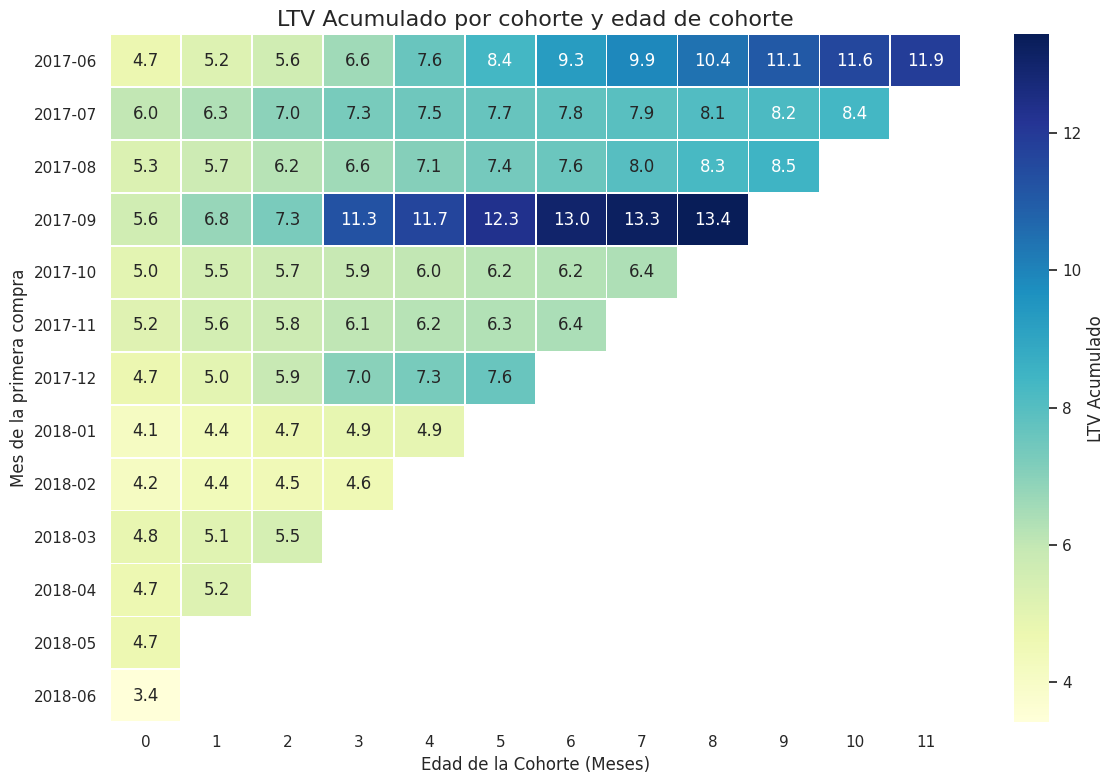

In [24]:
plt.figure(figsize=(12, 8))
sns.heatmap(
    ltv_table_pivot,
    annot=True,  
    fmt=".1f",   
    cmap="YlGnBu",  
    linewidths=0.5, 
    cbar_kws={'label': 'LTV Acumulado'}  
)

# Personalizar el gráfico
plt.title('LTV Acumulado por cohorte y edad de cohorte', fontsize=16)
plt.xlabel('Edad de la Cohorte (Meses)', fontsize=12)
plt.ylabel('Mes de la primera compra', fontsize=12)
plt.tight_layout()  # Ajustar el layout
plt.show()

3- Marketing:

¿Cuánto dinero se gastó?  (Total/por fuente de adquisición/a lo largo del tiempo) 

¿Cuál fue el costo de adquisición de clientes de cada una de las fuentes?

¿Cuán rentables eran las inversiones? (ROMI)

In [25]:
#en primer lugar,se deben cambiar todas las mayusculas a minusculas y los espacios por guiones bajos  en los enunciados para mayor claridad al trabajar con los datos

costs.columns = costs.columns.str.lower().str.replace(' ', '_')

display(costs.head())

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [26]:
#se corrobora que no hay datos no existentes en la tabla visits 
print(costs.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB
None


In [27]:
#se calcula el total gastado en todas las fuentes de tráfico en ambos años
total_costs = costs['costs'].sum()
print(f"Total gastado en marketing: ${total_costs:.2f}")


# se agrupa por fuente de tráfico para calcular lo gastado en marketing en cada una de ellas
costs_per_source = costs.groupby('source_id')['costs'].sum().reset_index()
costs_per_source.rename(columns={'costs': 'total_costs'}, inplace=True)
print("\nGastos por fuente de adquisición:")
display(costs_per_source)


# se agrupa por fecha para  obtner los gastos en ambos años
# Convertir la columna 'dt' a formato datetime
costs['dt'] = pd.to_datetime(costs['dt'])

#se agrupa por fecha y se suman los costos
costs_per_date = costs.groupby('dt')['costs'].sum().reset_index()
print("\nGastos a lo largo del tiempo:")
display(costs_per_date)

Total gastado en marketing: $329131.62

Gastos por fuente de adquisición:


,source_id,total_costs
0,1,20833.27
1,2,42806.04
2,3,141321.63
3,4,61073.60
4,5,51757.10
5,9,5517.49
6,10,5822.49



Gastos a lo largo del tiempo:


,dt,costs
0,2017-06-01,735.26
1,2017-06-02,721.19
2,2017-06-03,450.85
3,2017-06-04,761.16
4,2017-06-05,821.44
...,...,...
359,2018-05-27,532.87
360,2018-05-28,619.44
361,2018-05-29,784.79
362,2018-05-30,1183.00


In [28]:
#se agrupa por fuente de tráfico y fecha para obtener los gastos en cada fuente a lo largo de los dos años de registro, de manera mensual
# Convertir la columna 'dt' a formato datetime
costs['dt'] = pd.to_datetime(costs['dt'])

# Extraer el año y el mes de la columna 'dt'
costs['year_month'] = costs['dt'].dt.to_period('M')  # Formato: Año-Mes (ej. 2023-01)

# Agrupar por 'source_id' y 'year_month', y sumar los costos
costs_per_source_and_date = costs.groupby(['source_id', 'year_month'])['costs'].sum().reset_index()

# Convertir 'year_month' a string para facilitar la visualización en el gráfico
costs_per_source_and_date['year_month'] = costs_per_source_and_date['year_month'].astype(str)


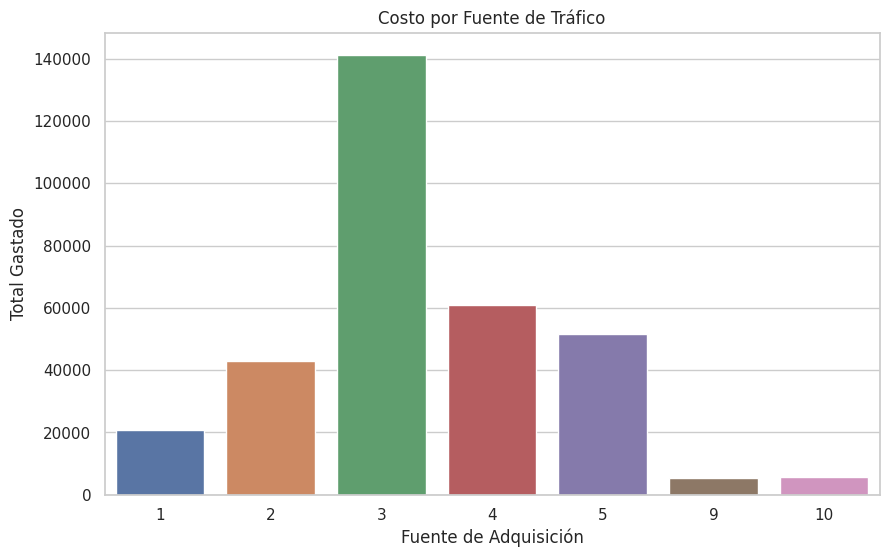

In [29]:
#se grafican los gastos por fuente de trafico
plt.figure(figsize=(10, 6))
sns.barplot(x='source_id', y='total_costs', data=costs_per_source)
plt.title('Costo por Fuente de Tráfico')
plt.xlabel('Fuente de Adquisición')
plt.ylabel('Total Gastado')
plt.show()

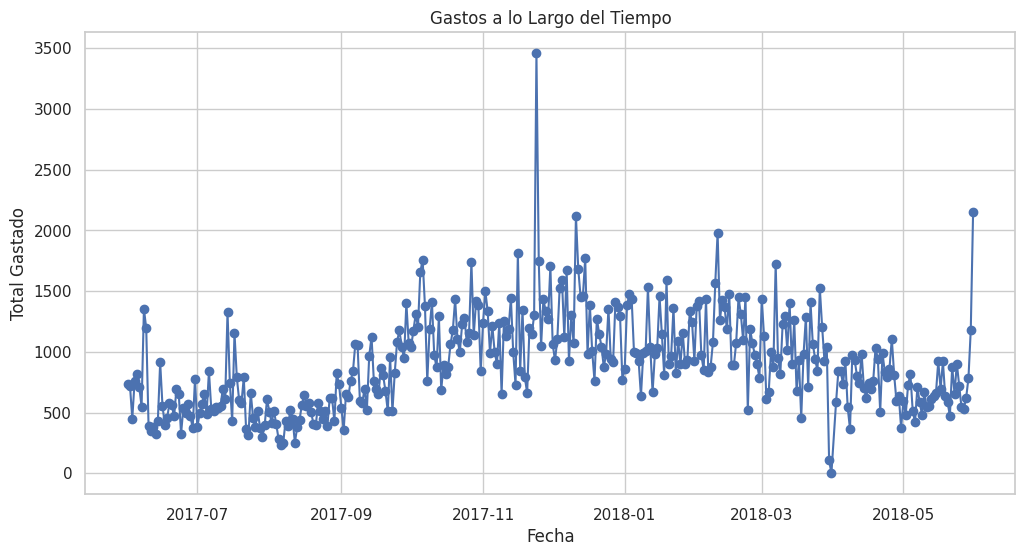

In [30]:
#Gastos a lo largo del tiempo
plt.figure(figsize=(12, 6))
plt.plot(costs_per_date['dt'], costs_per_date['costs'], marker='o', linestyle='-', color='b')
plt.title('Gastos a lo Largo del Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Total Gastado')
plt.grid(True)
plt.show()

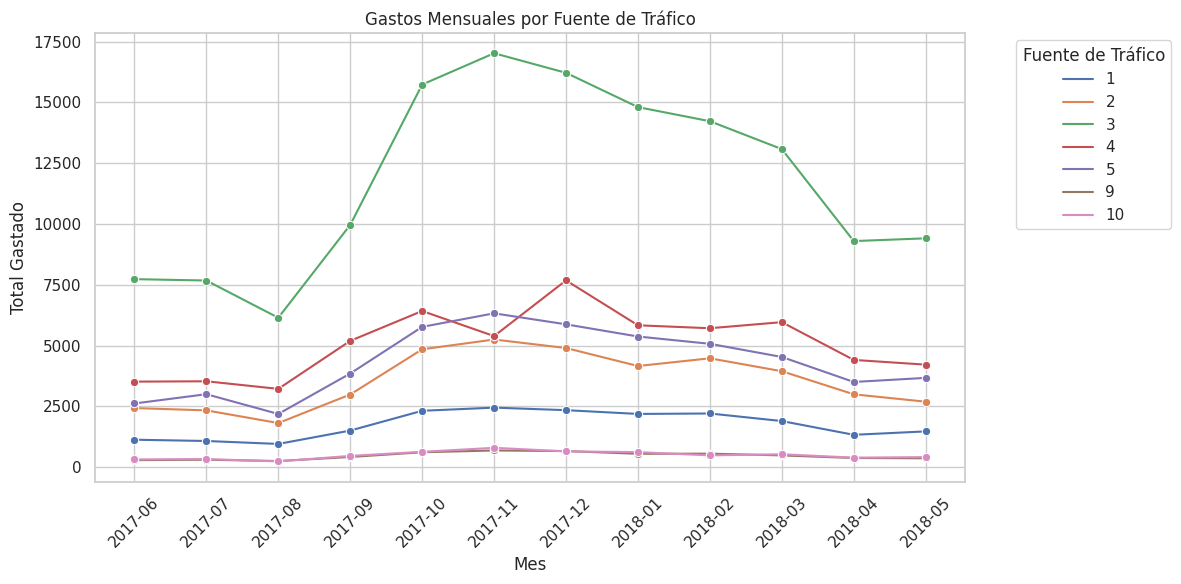

In [31]:
#se grafican los costos por fuente de tráfico a lo alrgo del tiempo
plt.figure(figsize=(12, 6))

# Usar seaborn para trazar las líneas
sns.lineplot(
    x='year_month', 
    y='costs', 
    hue='source_id', 
    data=costs_per_source_and_date, 
    marker='o', 
    palette= 'deep'
   
)

# Añadir título y etiquetas
plt.title('Gastos Mensuales por Fuente de Tráfico')
plt.xlabel('Mes')
plt.ylabel('Total Gastado')
plt.xticks(rotation=45)
plt.legend(title='Fuente de Tráfico', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Para conocer el costo de adquirir un cliente, se deben conocer los costos totales por fuente de tráfico y el número de clientes adquiridos por fuente.

Lo primero se obtuvo en cost_per_source, por lo que se debe calcular el número de clientes adquiridos por fuente

In [32]:
# CÓDIGO REVISOR
visits = visits.sort_values(by='start_ts')

In [33]:
# Se identifican las fuentes de la primera visita y la fecha de la primera compra para cada usuario
# Obtener la primera visita de cada usuario (mínimo start_ts) y su fuente
first_visit = visits.groupby('uid').agg({'start_ts': 'min', 'source_id': 'first'}).reset_index()
first_visit.rename(columns={'start_ts': 'first_visit_ts'}, inplace=True)

# Obtener la primera compra de cada usuario (mínimo buy_ts)
first_purchase = orders.groupby('uid').agg({'buy_ts': 'min'}).reset_index()
first_purchase.rename(columns={'buy_ts': 'first_purchase_ts'}, inplace=True)

# Se unen las primeras visitas con las primeras compras
user_data = pd.merge(first_visit, first_purchase, on='uid', how='inner')

# Se agrupa por fuente y fecha de compra para contar la cantidad de usuarios que hicieron al menos una compra
# primero se extrae la fecha de la primera compra (sin la hora)
user_data['purchase_date'] = user_data['first_purchase_ts'].dt.date

# LUuego se agrupa por source_id y purchase_date para contar los usuarios únicos que compraron
buyers_per_source_date = user_data.groupby(['source_id', 'purchase_date']).agg({'uid': 'nunique'}).reset_index()
buyers_per_source_date.rename(columns={'uid': 'total_buyers'}, inplace=True)

# Se deben unir los costos de marketing por fecha y fuente
# Convertir la columna 'dt' en costs a tipo fecha (si no lo está)
costs['dt'] = pd.to_datetime(costs['dt']).dt.date

# Unir costos con buyers_per_source_date
cac_daily = pd.merge(costs, buyers_per_source_date, left_on=['source_id', 'dt'], right_on=['source_id', 'purchase_date'], how='left')

# Se calcula el CAC diario
cac_daily['CAC_daily'] = cac_daily['costs'] / cac_daily['total_buyers']

# Se agrupan los CAC diarios por fuente y se obtiene el promedio como el CAC por fuente
cac_per_source = cac_daily.groupby('source_id')['CAC_daily'].mean().reset_index()
cac_per_source.rename(columns={'CAC_daily': 'CAC'}, inplace=True)

# Mostrar el resultado
display(cac_per_source)



,source_id,CAC
0,1,9.489732
1,2,16.287024
2,3,15.580474
3,4,7.271743
4,5,8.336731
5,9,6.842532
6,10,6.555415


In [34]:
#Se obtiene la estadística descriptiva del CAC relacionado a cada fuente de tráfico

CAC = pd.DataFrame(cac_per_source)

# Calcular métricas estadísticas
cac_mean = CAC["CAC"].mean()  # Media
cac_median = CAC["CAC"].median()  # Mediana
cac_std = CAC["CAC"].std()  # Desviación estándar
cac_min = CAC["CAC"].min()  # Valor mínimo
cac_max = CAC["CAC"].max()  # Valor máximo

# Imprimir resultados
print(f"Media del CAC: {cac_mean:.4f}")
print(f"Mediana del CAC: {cac_median:.4f}")
print(f"Desviación estándar del CAC: {cac_std:.4f}")
print(f"Valor mínimo del CAC: {cac_min:.4f}")
print(f"Valor máximo del CAC: {cac_max:.4f}")

Media del CAC: 10.0519
Mediana del CAC: 8.3367
Desviación estándar del CAC: 4.1424
Valor mínimo del CAC: 6.5554
Valor máximo del CAC: 16.2870


Para saber qué tan rentable fueron las inversiones, debo conocer los ingresos generados por cada fuente de tráfico y los costos de marketing por cada fuente de tráfico

In [35]:
# Primero se ordenan las fechas que se muestran en start_ts de la tabla visits de menor a mayor
visits = visits.sort_values(by='start_ts')
#se obtiene la primera visita de cada usuario 
first_visit = visits.groupby('uid').agg({'start_ts': 'min', 'source_id': 'first'}).reset_index()
first_visit.rename(columns={'start_ts': 'first_visit_ts'}, inplace=True)

# Luego se debe obtener la primera compra de cada usuario y extraer el mes de la primera compra
first_purchase = orders.groupby('uid').agg({'buy_ts': 'min'}).reset_index()
first_purchase.rename(columns={'buy_ts': 'first_purchase_ts'}, inplace=True)
first_purchase['first_purchase_month'] = first_purchase['first_purchase_ts'].dt.to_period('M') 

#Se une la primera visita y la primera compra para cada usuario.Se debeincluir 'first_purchase_month' en la unión
user_data = pd.merge(first_visit, first_purchase[['uid', 'first_purchase_ts', 'first_purchase_month']], on='uid', how='inner')

#Se une esta información con todas las compras que se detallan en tabla orders.Para ello se
# agrega el source de la primera visita y el mes de la primera compra a cada compra
orders_with_source = pd.merge(orders, user_data[['uid', 'source_id', 'first_purchase_month']], on='uid', how='left')

#Se debe calcular la edad de la compra (meses desde la primera compra)
orders_with_source['purchase_month'] = orders_with_source['buy_ts'].dt.to_period('M')
orders_with_source['age'] = (orders_with_source['purchase_month'] - orders_with_source['first_purchase_month']).apply(lambda x: x.n)

# Se comienza con la iteración sobre cada source, i:
romi_results = []

for source in orders_with_source['source_id'].unique():
    # Filtrar datos para la fuente actual
    source_data = orders_with_source[orders_with_source['source_id'] == source].copy()  # Copia explícita
    
    # Calcular el tamaño de cada cohorte (usuarios únicos por mes de primera compra)
    cohort_size = source_data.groupby('first_purchase_month')['uid'].nunique().reset_index()
    cohort_size.rename(columns={'uid': 'cohort_size'}, inplace=True)
    
    # Calcular el revenue acumulado por mes para cada cohorte
    revenue_by_cohort = source_data.groupby(['first_purchase_month', 'age'])['revenue'].sum().reset_index()
    revenue_by_cohort['cumulative_revenue'] = revenue_by_cohort.groupby(['first_purchase_month'])['revenue'].cumsum()
    
    # Unir el tamaño de la cohorte con el revenue
    cohort_data = pd.merge(revenue_by_cohort, cohort_size, on='first_purchase_month', how='left')
    
    # Calcular el LTV por cohorte (revenue acumulado / cohort_size)
    cohort_data['ltv'] = cohort_data['cumulative_revenue'] / cohort_data['cohort_size']
    
    # Obtener los costos mensuales para la fuente actual
    costs_source = costs[costs['source_id'] == source].copy()
    costs_source['dt'] = pd.to_datetime(costs_source['dt']).dt.to_period('M')
    costs_monthly = costs_source.groupby('dt')['costs'].sum().reset_index()
    costs_monthly.rename(columns={'dt': 'first_purchase_month'}, inplace=True)
    
    # Unir los costos con los datos de la cohorte
    cohort_data = pd.merge(cohort_data, costs_monthly, on='first_purchase_month', how='left')
    
    # Calcular el CAC por cohorte (costs / cohort_size)
    cohort_data['cac'] = cohort_data['costs'] / cohort_data['cohort_size']
    
    # Calcular el ROMI por cohorte (LTV / CAC)
    cohort_data['romi'] = cohort_data['ltv'] / cohort_data['cac']
    
    # Agregar la fuente a los resultados
    cohort_data['source_id'] = source
    romi_results.append(cohort_data)


# Combinar todos los resultados en un solo DataFrame
romi_final = pd.concat(romi_results, ignore_index=True)

# Crear una tabla pivote para presentar el ROMI por fuente y cohorte
romi_pivot = romi_final.pivot_table(index='first_purchase_month', columns=['source_id', 'age'], values='romi', aggfunc='mean')

# Mostrar el resultado
print(romi_pivot)

source_id                   1                                           \
age                          0         1         2         3         4   
first_purchase_month                                                     
2017-06               1.224847  1.593518  1.966143  2.600679  3.321355   
2017-07               1.087447  1.250848  2.049390  2.274131  2.405115   
2017-08               0.889621  1.031761  1.151700  1.266240  1.389626   
2017-09               0.909009  1.181317  1.265844  1.405616  1.411475   
2017-10               0.883658  1.038674  1.074611  1.131551  1.140840   
2017-11               0.979343  1.055375  1.183056  1.301506  1.323140   
2017-12               0.648129  0.692102  0.732928  0.767666  0.771425   
2018-01               0.628027  0.637880  0.653615  0.759581  0.764946   
2018-02               0.584628  0.709355  0.717757  0.763854       NaN   
2018-03               1.386838  1.674627  1.791706       NaN       NaN   
2018-04               0.634370  0.6707

In [36]:
# Resumen del ROMI por source_id
romi_summary = romi_final.groupby('source_id')['romi'].agg(['mean', 'max', 'min']).reset_index()
print("Resumen del ROMI por source_id:")
display(romi_summary)

Resumen del ROMI por source_id:


,source_id,mean,max,min
0,1,1.693307,5.679045,0.584628
1,2,0.909760,2.881190,0.305034
2,3,0.389840,0.539898,0.278585
3,4,0.853206,1.475637,0.532101
4,5,1.128959,4.004988,0.499633
5,7,NaN,NaN,NaN
6,9,1.082110,2.024012,0.414394
7,10,0.733060,1.248912,0.417066


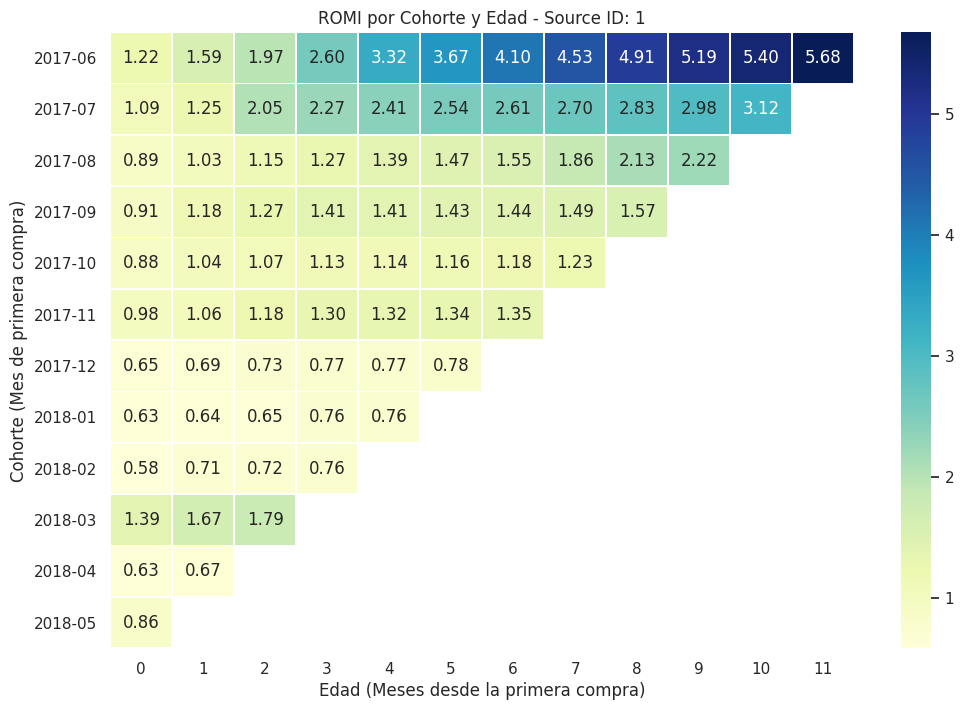

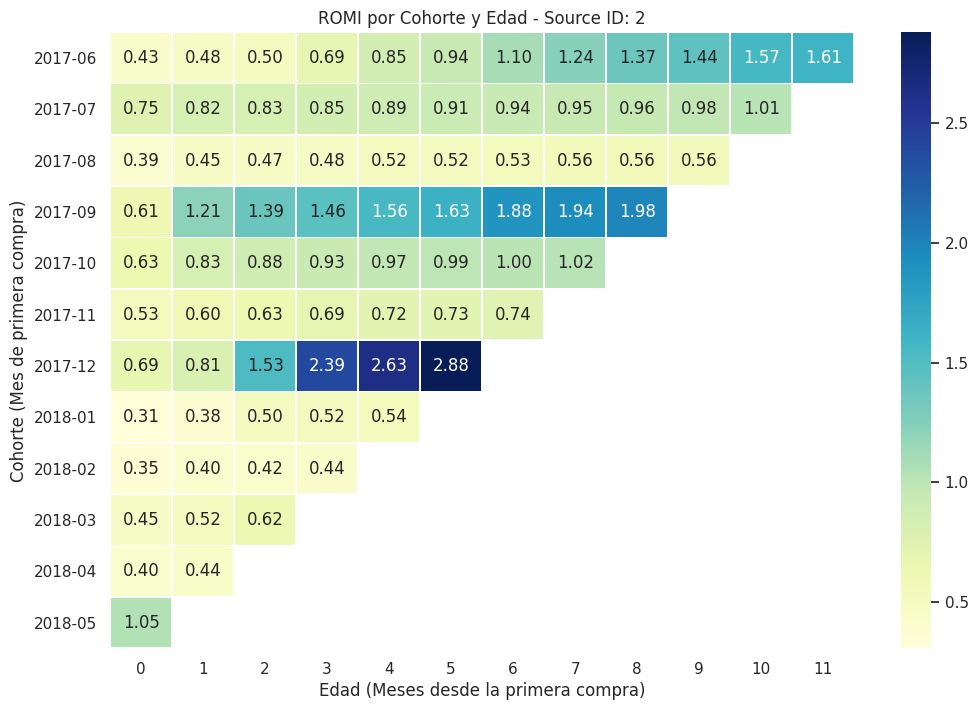

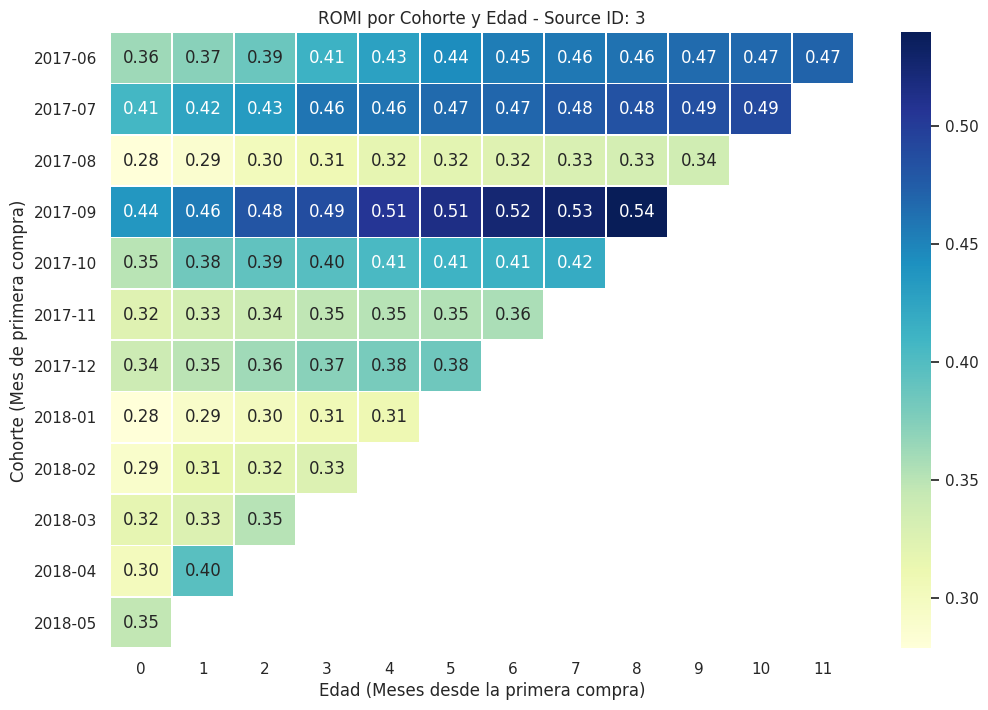

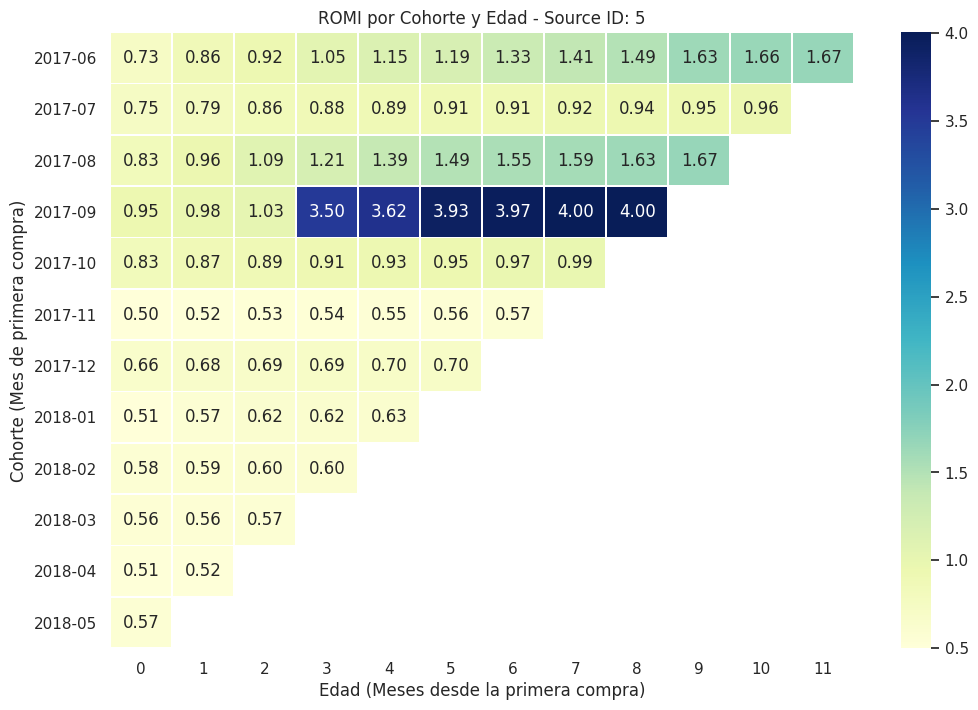

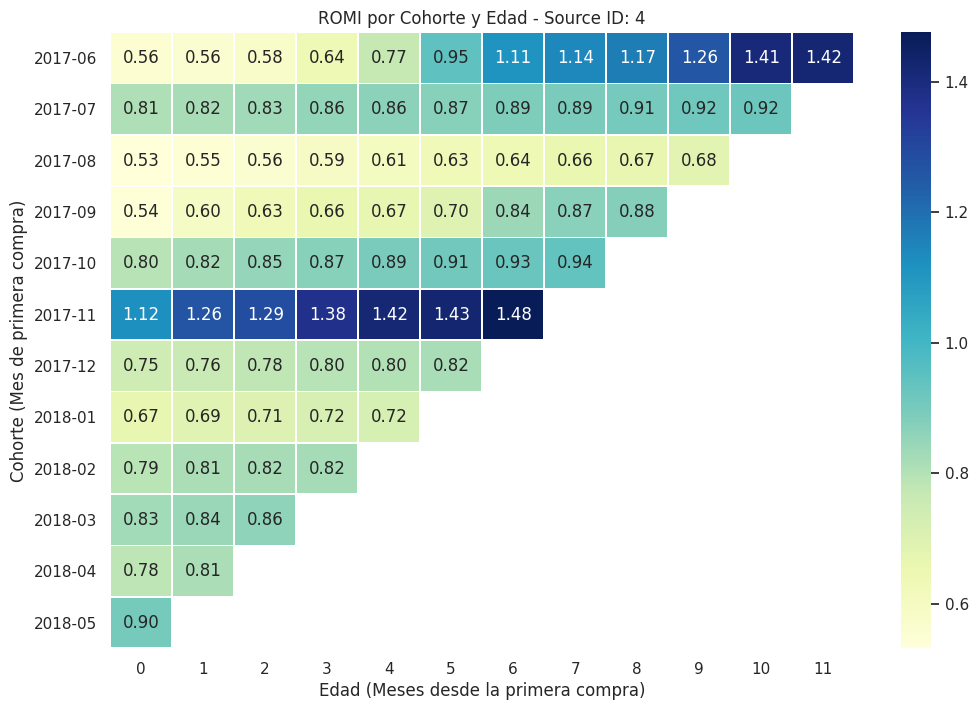

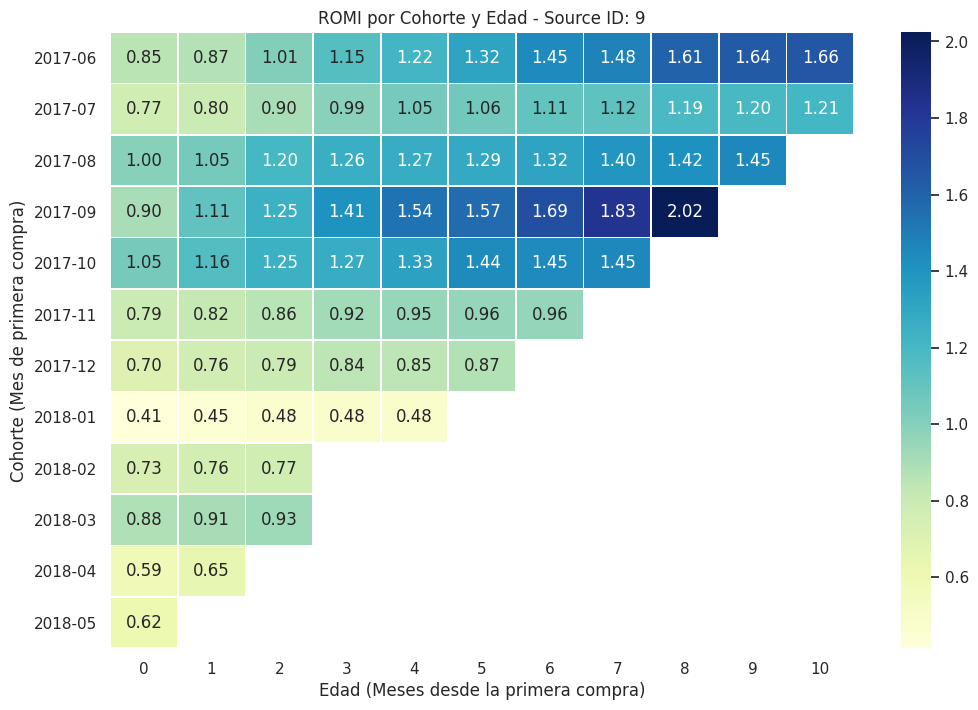

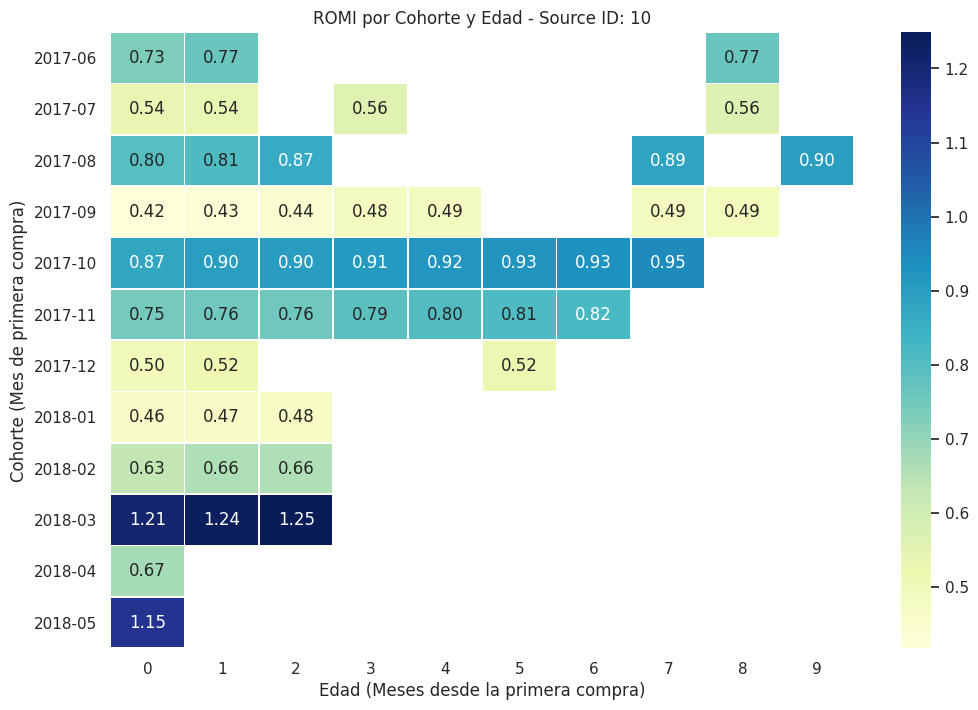

In [37]:
# Excluir source_id = 7 antes de entrar al bucle
romi_final_filtered = romi_final[romi_final['source_id'] != 7]

# Iterar sobre los source_id únicos restantes
for source in romi_final_filtered['source_id'].unique():
    # Filtrar los datos para el source_id actual
    source_data = romi_final_filtered[romi_final_filtered['source_id'] == source]
    
    # Verificar si hay suficientes datos para crear la tabla pivote
    if source_data['age'].nunique() < 2 or source_data['first_purchase_month'].nunique() < 2:
        print(f"No hay suficientes datos para crear la tabla pivote para el Source ID: {source}. Saltando...")
        continue
    
    # Crear la tabla pivote
    pivot_table = source_data.pivot_table(index='first_purchase_month', columns='age', values='romi', aggfunc='mean')
    
    # Verificar si la tabla pivote está vacía
    if pivot_table.empty:
        print(f"No hay datos válidos para el Source ID: {source}. Saltando...")
        continue
    
    # Crear el heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap="YlGnBu", linewidths=0.5)
    
    plt.title(f'ROMI por Cohorte y Edad - Source ID: {source}')
    plt.xlabel('Edad (Meses desde la primera compra)')
    plt.ylabel('Cohorte (Mes de primera compra)')
    
    plt.show()
    
  


CONCLUSIONES

1. Al sitio llegaron 228169 usuarios diferentes en el período estudiado, siendo solo 36523 de ellos usuarios que realizaron una compra.Esto corresponde al 16% del total, por lo que se debe poner atención a cómo están funcionando los canales que atraen clientes y cómo funciona la página para persuadirlos de realizar su compra.

2. De los 36523 usuarios que hicieron efectiva una compra,más del 80% la realizaron dentro de las primera 24 horas posteriores a su primer ingreso a la página.Esto puede indicar que quienes desdeaban adquirir un producto, lo hicieron sin dudar mucho. Se podría considerar los factores que afectaron a que los usuarios restantes demoraran en realizar su pedido y trabajar en ello al mismo tiempo que se trabajan en estrategias para fidelizar a quienes realizaron su compra rápidamente (encuestas de satisfacción, envío de promociones, etc.)

3. Sobre las fuentes de tráfico, las tres que más atraen visitas son la 1, 2 y 5 .Se deben ver estrategias que permitan fidelizar mas rápidamente a quienes ingresan, tratando de conducir a una venta lo más rapido posible.

4. Sobre los costos, la fuente 3 es la que registra los costos más altos respecto a marketing.Se debe estudiar qué está sucediendo con la tasa de conversión, pues la inversión que se está realizando no se ve reflejada en las ganancias.
5. Se observa que en los dos años de datos, los valores mayores de pedidos se encuentran enbtre octuibre y diciembre del 2017.El tamaño promedio de la compra varía similar a la cantidad de estos, excepto en el mes de enero de 2018, donde este baja de manera mpás abrupta.

6. Sobre el CAC, se observa que la empresa gasta en promedio $9.46 para adquirir un nuevo cliente.La mediana es menor a la media, por lo que existen valores significativamente más altos que los demás haciendo que la media se eleve.Esto es claro al ver el valor de la desviación estandar, que indica una variabilidad considerable en los valores del CAC según fuente de tráfico.Esto puede estar siendo provocado por contar con distintas condiciones en cada una de ellas como lo pueden ser campañas de marketing muy diferenciadas, variaciones en costos de los canales para realizar publicidad o cambios en el comportamiento de los ususarios influenciados por el mercado.
Se recomienda también poner especial ateción al valor mínimo, pues ello idica que se pueden adquirir clientes a un bajo precio, solo falta explotar esas condiciones y replicarlo parfa lograr mayores ingresos a menor costo.

7. Sobre los valores de ROMI obtenidos: se observa gran variabilidad entre las distintas fuentes de tráfico, esto puede indicar que algunas son más rentables que otras.Esto ocurre también al observar los meses; donde también ocurre gran variabilidad de este valor.
La fuente 1 presenta sus valors mayores de ROMI en el mes de junio de 2017, teniendo también el mayor valor entre todas las fuentes de tráfico.Este valor es seguido por la fuente 5, que alcanza su máximo en noviembre de 2017.Estos altos valores de romi para ambas fuentes de táfico significa que son las más efectivas en cuanto al retorno de la inversión.

La fuente 3 muestra el menor valor de ROMI, seguida de la fuente 10.Esto indcia que ambas fuentes de tráfico son las menos efectivas en cuanto a retornos de la inversión.Se debeería analizar si seguir utilizándolas o no a la brevedad para enfocar lkos esfuerzos en aquellas que si han demostrado ser más efectivas al momento de aumentar el ciclo de vida del cliente. 